In [151]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Reading the .xlsx file

In [152]:
# Read the following .xlsx file into a DataFrame
df = pd.read_excel('/Users/johanmasvie/programming/tiø4900/master_thesis/Data/Gas Trade Flows - January 2024.xlsx')

### Dropping uneccesary columns

In [153]:
# Drop the "Unnamed: 2" column
df = df.drop(columns=['Unnamed: 2'])
# Drop the columns "Countries", "Capacity missing initially (Y/N)", "Surpass capacity? (Y/N)", "Source", "Comment"
df = df.drop(columns=['Countries', 'Capacity missing initially (Y/N)', 'Surpass capacity? (Y/N)', 'Source', 'Comment'])
df.head()

,Borderpoint,Exit,Entry,Capacity (mcm/h),2008-10-01 00:00:00,2008-11-01 00:00:00,2008-12-01 00:00:00,2009-01-01 00:00:00,2009-02-01 00:00:00,2009-03-01 00:00:00,...,2023-04-01 00:00:00,2023-05-01 00:00:00,2023-06-01 00:00:00,2023-07-01 00:00:00,2023-08-01 00:00:00,2023-09-01 00:00:00,2023-10-01 00:00:00,2023-11-01 00:00:00,Total,# months since last flow
0,Adriatic LNG,Liquefied Natural Gas,Italy,1.100,0.00,0.00,0.00,0.00,0.00,0.00,...,714.000,809.00,620.00,823.000,693.000,754.000,745.000,797.000,95317.000,0
1,Almeria,Algeria,Spain,1.071,0.00,0.00,0.00,0.00,0.00,0.00,...,619.000,698.00,448.00,767.000,696.000,709.000,863.000,829.000,81778.841,0
2,Alveringem,France,Belgium,0.370,0.00,0.00,0.00,0.00,0.00,0.00,...,239.880,392.49,396.48,194.670,49.820,394.410,371.190,728.440,11492.689,0
3,Badajoz,Spain,Portugal,0.500,152.81,183.31,85.21,199.16,104.48,9.17,...,1.825,0.00,0.00,7.711,15.864,7.879,19.862,17.837,26499.298,0
4,Badajoz,Portugal,Spain,0.296,0.00,0.00,0.00,0.00,12.39,2.00,...,91.000,139.00,84.00,44.000,25.000,19.000,27.000,38.000,1568.006,0


### Plotting total flow

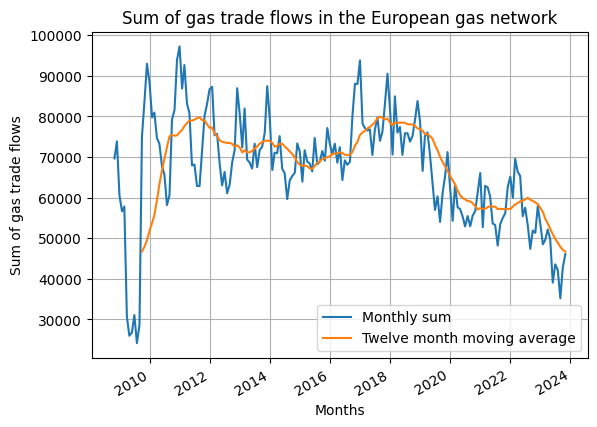

In [154]:
df.iloc[:, 5:186].sum().plot()
# Add a trend line showing the three month moving average
df.iloc[:, 5:186].sum().rolling(window=12).mean().plot()
plt.legend(['Monthly sum', 'Twelve month moving average'])
plt.xlabel('Months')
plt.ylabel('Sum of gas trade flows')
plt.title('Sum of gas trade flows in the European gas network')
plt.grid()
plt.show()

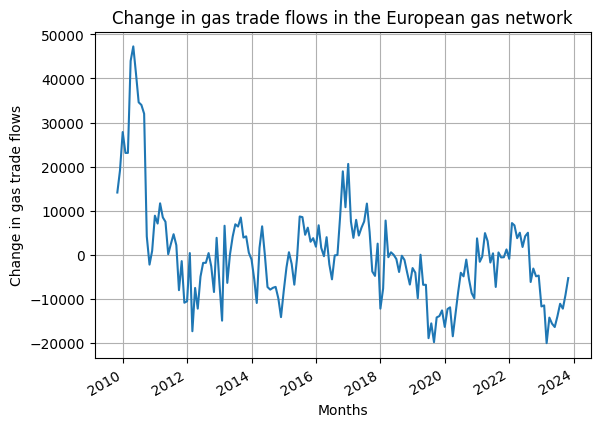

In [155]:
# Show the change in gas trade flows on a monthly basis, i.e., the difference between periods 12 months apart
df.iloc[:, 5:186].sum().diff(periods=12).plot()
plt.xlabel('Months')
plt.ylabel('Change in gas trade flows')
plt.title('Change in gas trade flows in the European gas network')
plt.grid()
plt.show()

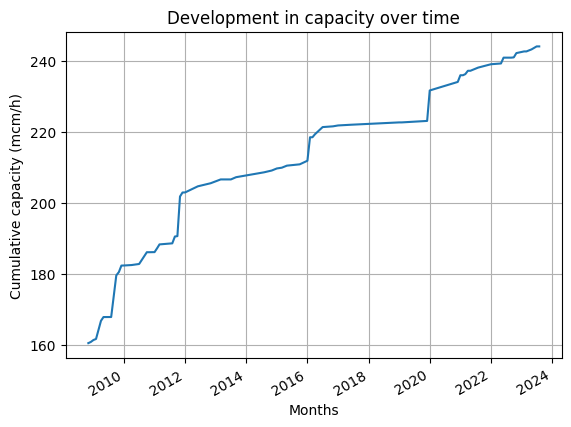

In [156]:
# Create a column called "First positive flow". Populate this column by iterating over columns 5-186 and finding the first month with a value greater than 0
df['First positive flow'] = df.iloc[:, 5:186].apply(lambda x: x[x > 0].index[0], axis=1)
# Plot the development in capacity over time by grouping the data by the "First positive flow" column, summing the "Capacity (mcm/h)" column and plotting the result in a cumulative manner.
df.groupby('First positive flow')['Capacity (mcm/h)'].sum().cumsum().plot()
plt.xlabel('Months')
plt.ylabel('Cumulative capacity (mcm/h)')
plt.title('Development in capacity over time')
plt.grid()
plt.show()

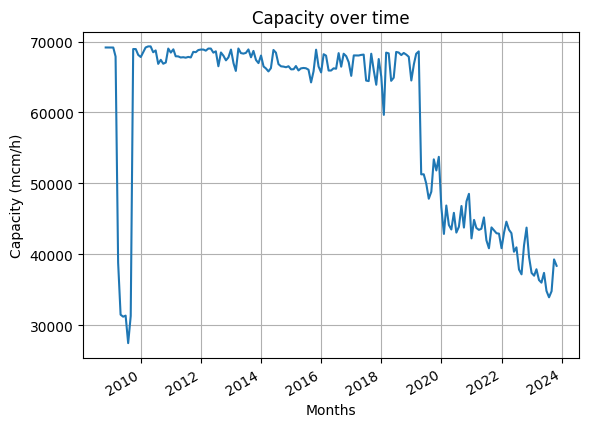

In [157]:
# Plot the capacity over time. However, for each column (month) 5-186, only include the capacity (col 4), if the flow (col 5-186) is greater than 0

# Create a new DataFrame with the same index and columns as the original DataFrame
df2 = pd.DataFrame(index=df.index, columns=df.columns)
# Populate the new DataFrame with the capacity (col 4) if the flow (col 5-186) is greater than 0
for i in range(5, 187):
    df2.iloc[:, i] = df.iloc[:, 4] * (df.iloc[:, i] > 0)
# Plot the capacity over time
df2.iloc[:, 5:186].sum().plot()
plt.xlabel('Months')
plt.ylabel('Capacity (mcm/h)')
plt.title('Capacity over time')
plt.grid()
plt.show()